In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load the dataset with a fallback encoding option
try:
    df = pd.read_csv('train.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('train.csv', encoding='latin1')  # or use 'ISO-8859-1'

# Preprocess the data
df['text'] = df['text'].fillna('')
X = df['text'].values
y = df['sentiment'].values  # Assuming 'sentiment' is the target column

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_len)

# Label encoding and one-hot encoding for multi-class classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of classes
num_classes = y.shape[1]

# Define and compile the RNN model
def build_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))
    model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define and compile the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define and compile the GRU model
def build_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    print(f"{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))
    print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

    return history

# Build and evaluate RNN model
rnn_model = build_rnn_model()
history_rnn = train_and_evaluate_model(rnn_model, X_train, y_train, X_test, y_test, 'RNN')

# Build and evaluate LSTM model
lstm_model = build_lstm_model()
history_lstm = train_and_evaluate_model(lstm_model, X_train, y_train, X_test, y_test, 'LSTM')

# Build and evaluate GRU model
gru_model = build_gru_model()
history_gru = train_and_evaluate_model(gru_model, X_train, y_train, X_test, y_test, 'GRU')


Epoch 1/2
687/687 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.3769 - loss: 1.1129 - val_accuracy: 0.5041 - val_loss: 0.9814
Epoch 2/2
687/687 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.5577 - loss: 0.9200 - val_accuracy: 0.6278 - val_loss: 0.8157
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
RNN Model Evaluation:
Accuracy: 0.6277969801710024
Confusion Matrix:
 [[ 899  557  106]
 [ 349 1426  455]
 [  68  511 1126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.62      1562
           1       0.57      0.64      0.60      2230
           2       0.67      0.66      0.66      1705

    accuracy                           0.63      5497
   macro avg       0.64      0.63      0.63      5497
weighted avg       0.63      0.63      0.63      5497

Epoch 1/2
687/687 ━━━━━━━━━━━━━━━━━━━━ 144s 206ms/step - accuracy: 0.5501 - loss: 0.9238 - val_accuracy: 0.7053 - val_loss: 0.6855
Epoch 2/2
687/687 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

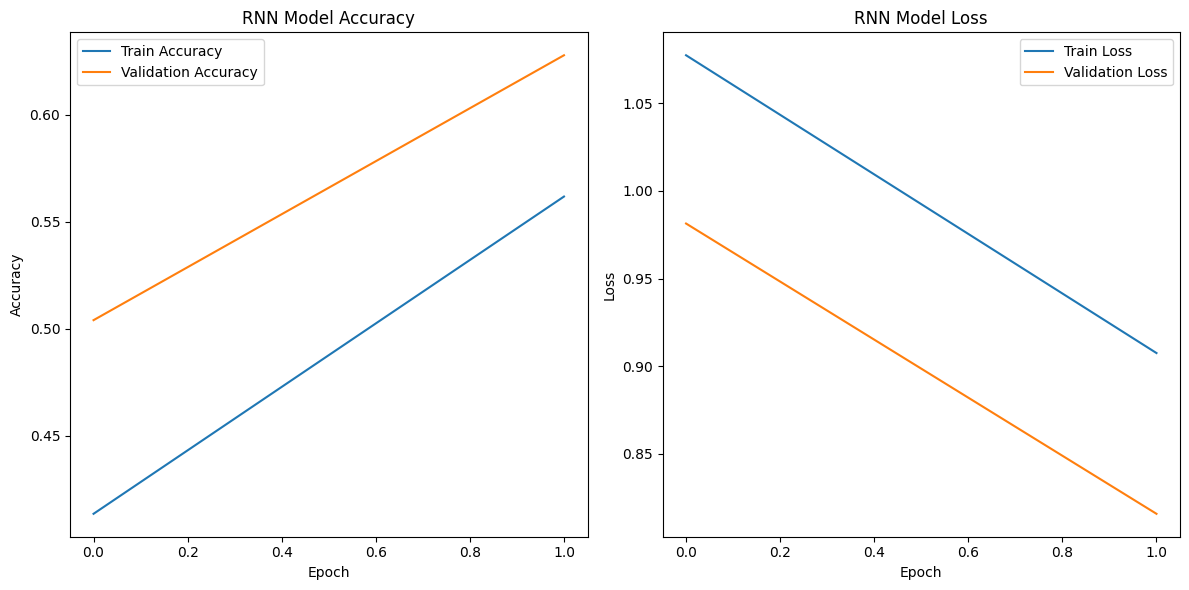

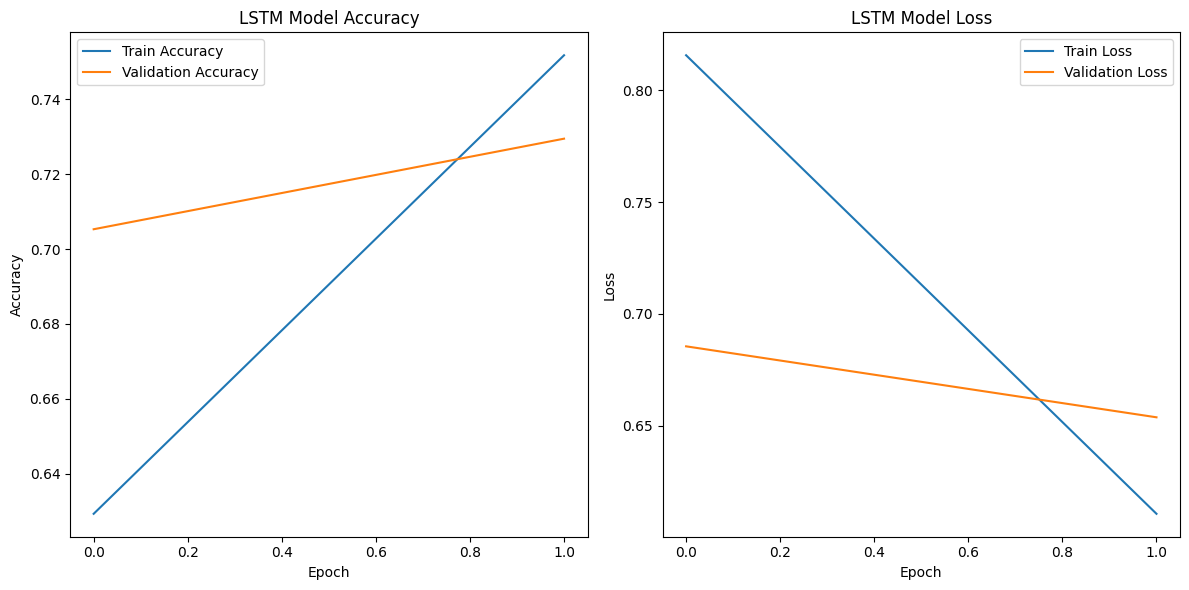

NameError: name 'history_gru' is not defined

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot RNN model history
plot_history(history_rnn, 'RNN')

# Plot LSTM model history
plot_history(history_lstm, 'LSTM')

# Plot GRU model history
plot_history(history_gru, 'GRU')
